In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/My Drive/kaggle_dataset'

In [3]:
%cd /content/gdrive/My Drive/kaggle_dataset

/content/gdrive/My Drive/kaggle_dataset


In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [5]:
df = pd.read_csv('/content/gdrive/My Drive/kaggle_dataset/heart_failure_clinical_records_dataset.csv')

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.shape

(299, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
cat_cols = [cat_col for cat_col in list(df.columns) if df[cat_col].nunique() < 3]

In [10]:
cat_cols

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [11]:
numeric_cols = list(set(list(df.columns)) - set(cat_cols))

In [12]:
print(numeric_cols)

['age', 'serum_creatinine', 'time', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium']


In [13]:
target = 'DEATH_EVENT'
cat_cols.remove(target)

In [14]:
cat_cols

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [15]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


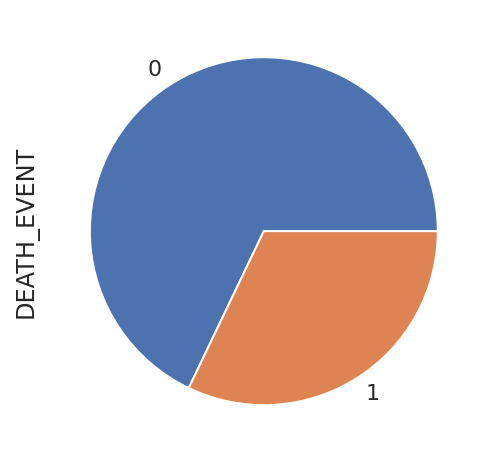

In [16]:
df['DEATH_EVENT'].value_counts().plot(kind='pie')

In [17]:
df[df['DEATH_EVENT'] == 1].mean()

age                             65.215281
anaemia                          0.479167
creatinine_phosphokinase       670.197917
diabetes                         0.416667
ejection_fraction               33.468750
high_blood_pressure              0.406250
platelets                   256381.044792
serum_creatinine                 1.835833
serum_sodium                   135.375000
sex                              0.645833
smoking                          0.312500
time                            70.885417
DEATH_EVENT                      1.000000
dtype: float64

In [49]:
df.groupby(by='DEATH_EVENT')[numeric_cols].agg([np.mean,np.median])

age        serum_creatinine  ... platelets serum_sodium       
                  mean median             mean  ...    median         mean median
DEATH_EVENT                                     ...                              
0            58.761906   60.0         1.184877  ...  263000.0   137.216749  137.0
1            65.215281   65.0         1.835833  ...  258500.0   135.375000  135.5

[2 rows x 14 columns]

In [19]:
df.groupby(by='DEATH_EVENT')[cat_cols].mean()

,anaemia,diabetes,high_blood_pressure,sex,smoking
DEATH_EVENT,,,,,
0,0.408867,0.418719,0.325123,0.650246,0.325123
1,0.479167,0.416667,0.406250,0.645833,0.312500


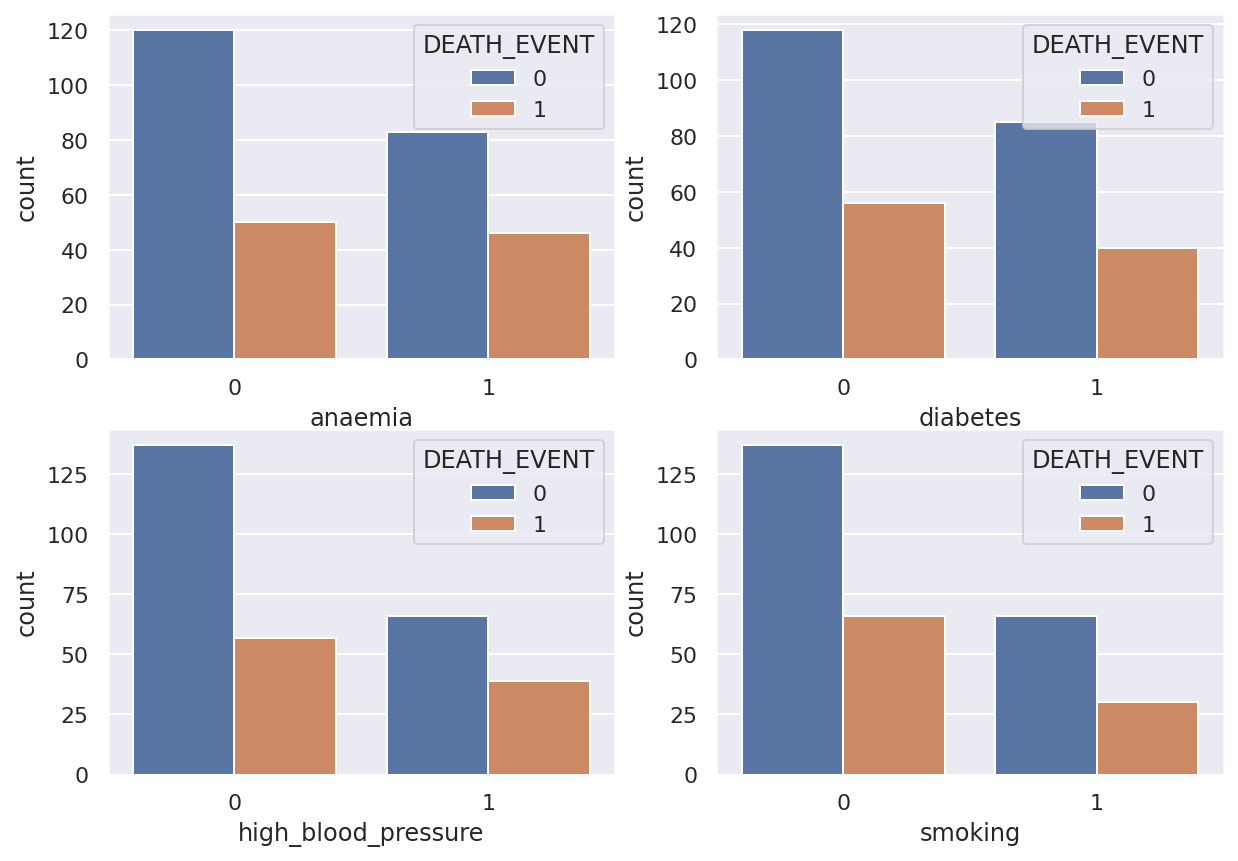

In [20]:
_, axes = plt.subplots(2,2,figsize=(10,7))
sns.countplot(x="anaemia", hue="DEATH_EVENT", data=df, ax  = axes[0,0]);
sns.countplot(x="diabetes", hue="DEATH_EVENT", data=df, ax  = axes[0,1]);
sns.countplot(x="high_blood_pressure", hue="DEATH_EVENT", data=df, ax  = axes[1,0]);
sns.countplot(x="smoking", hue="DEATH_EVENT", data=df, ax  = axes[1,1]);

The only inference one could make with confidence from these barplots is that a patient with high bp has higher tendency to die

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe41ed9610>,
      dtype=object)

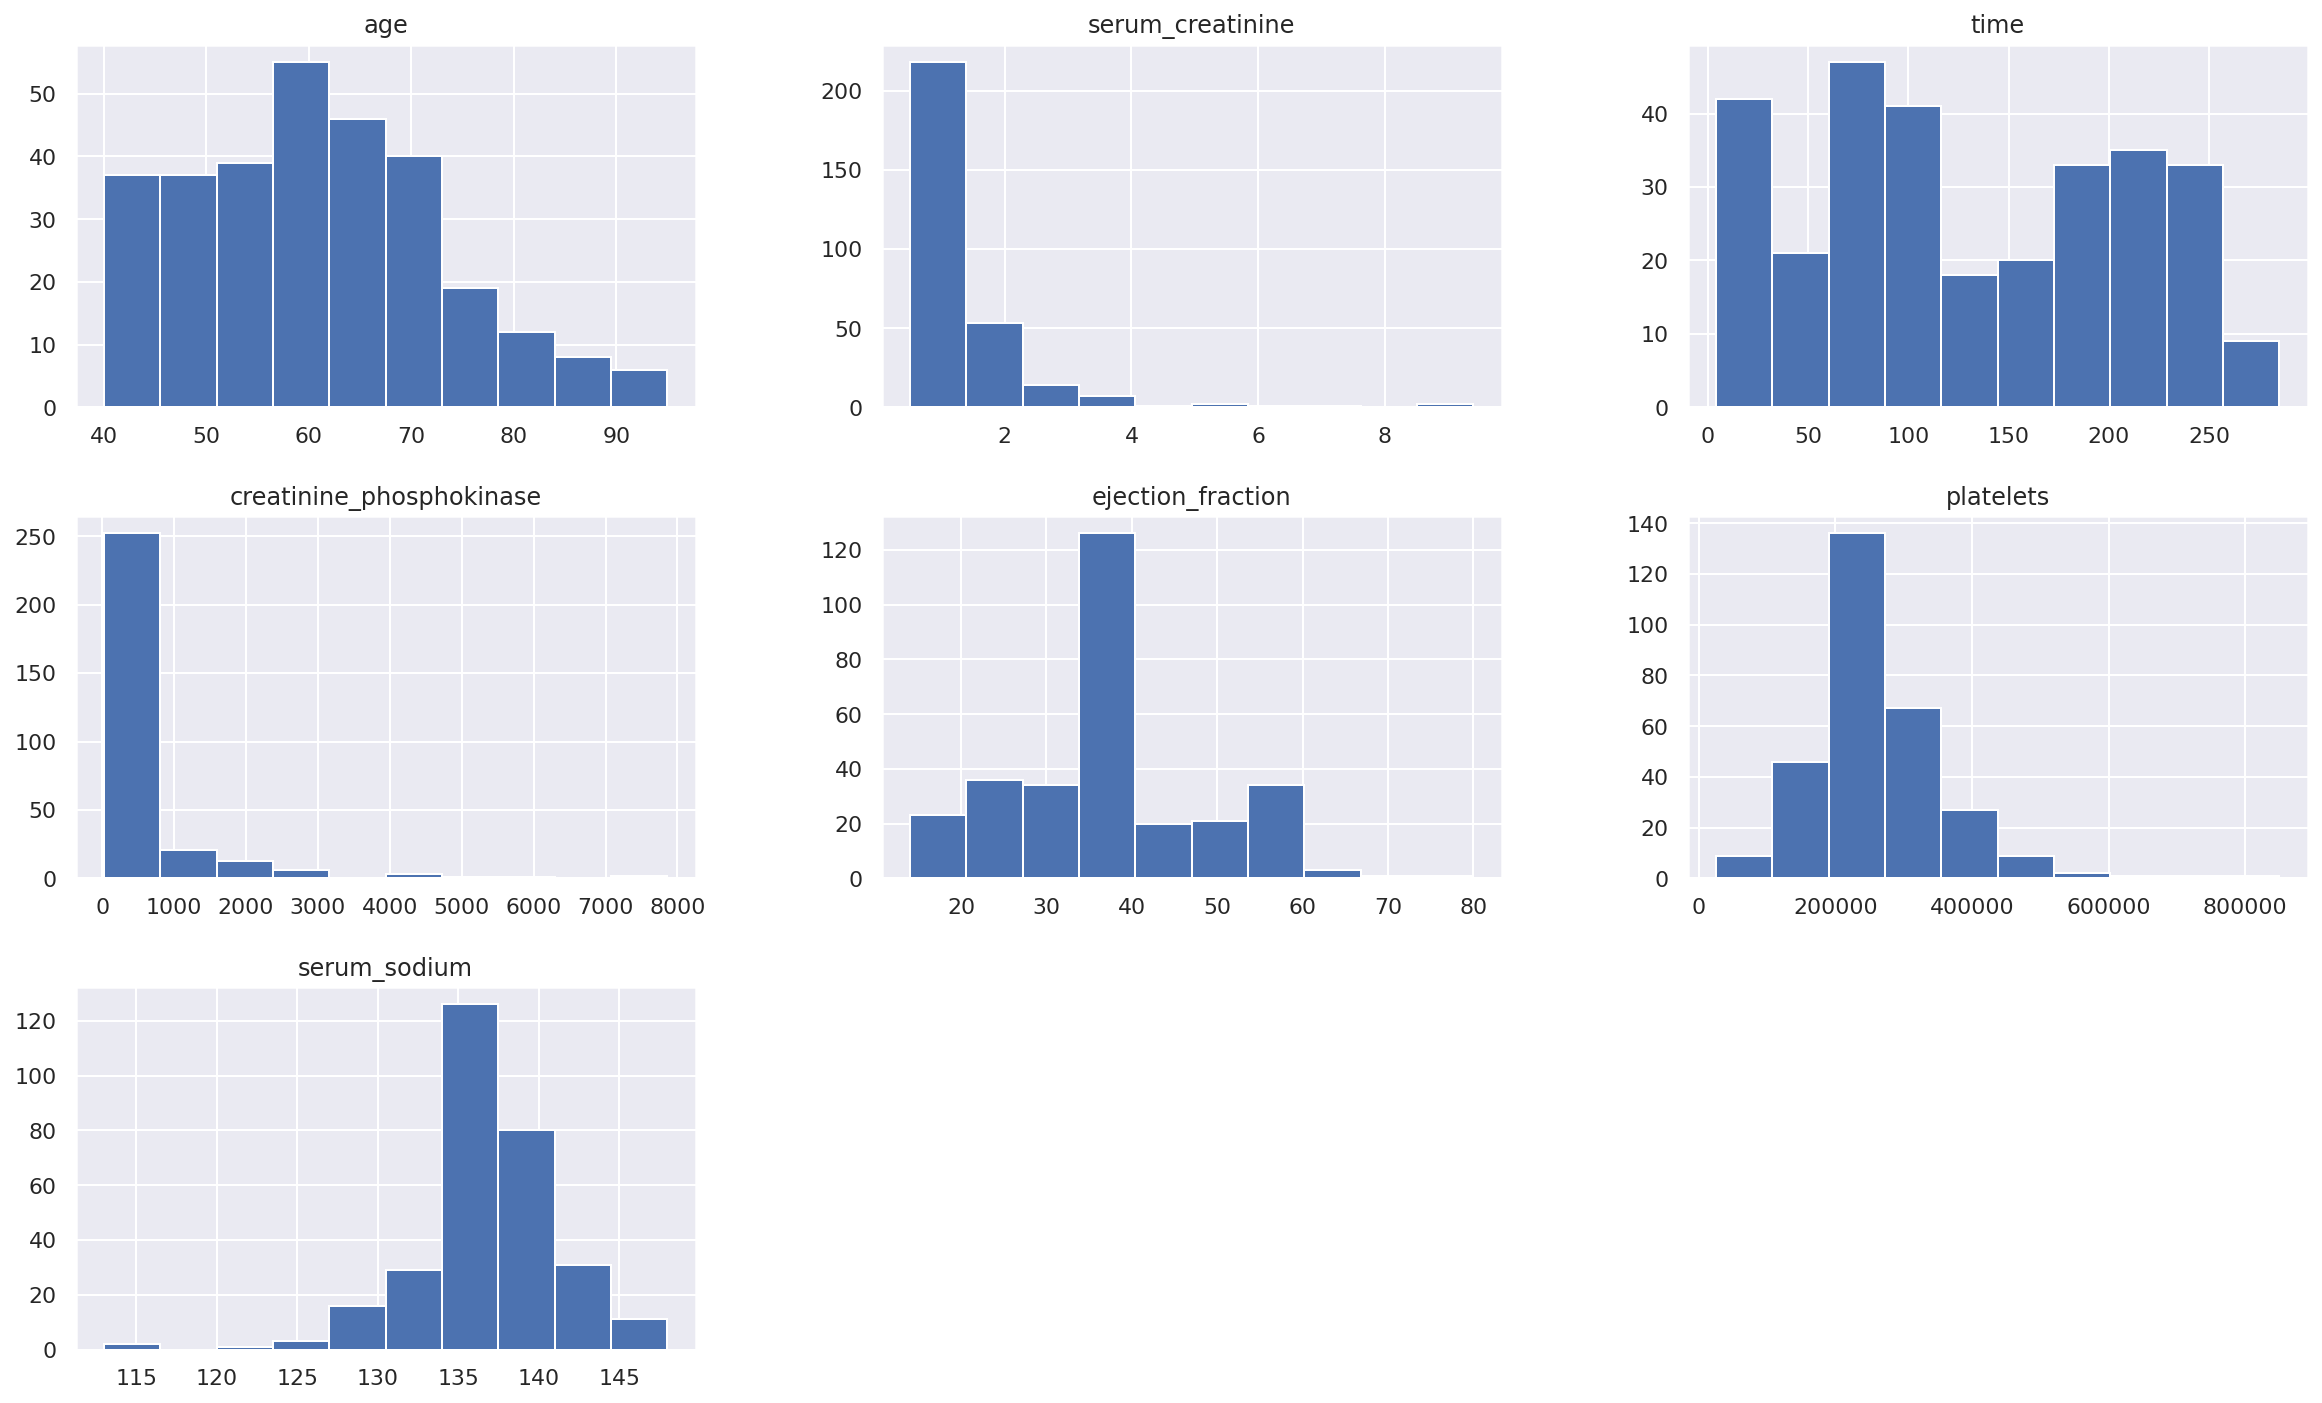

In [55]:
df[numeric_cols].hist(figsize=(20, 12))

Since most of the distributions are skewed, we'll consider using median when making inference instead of the mean .

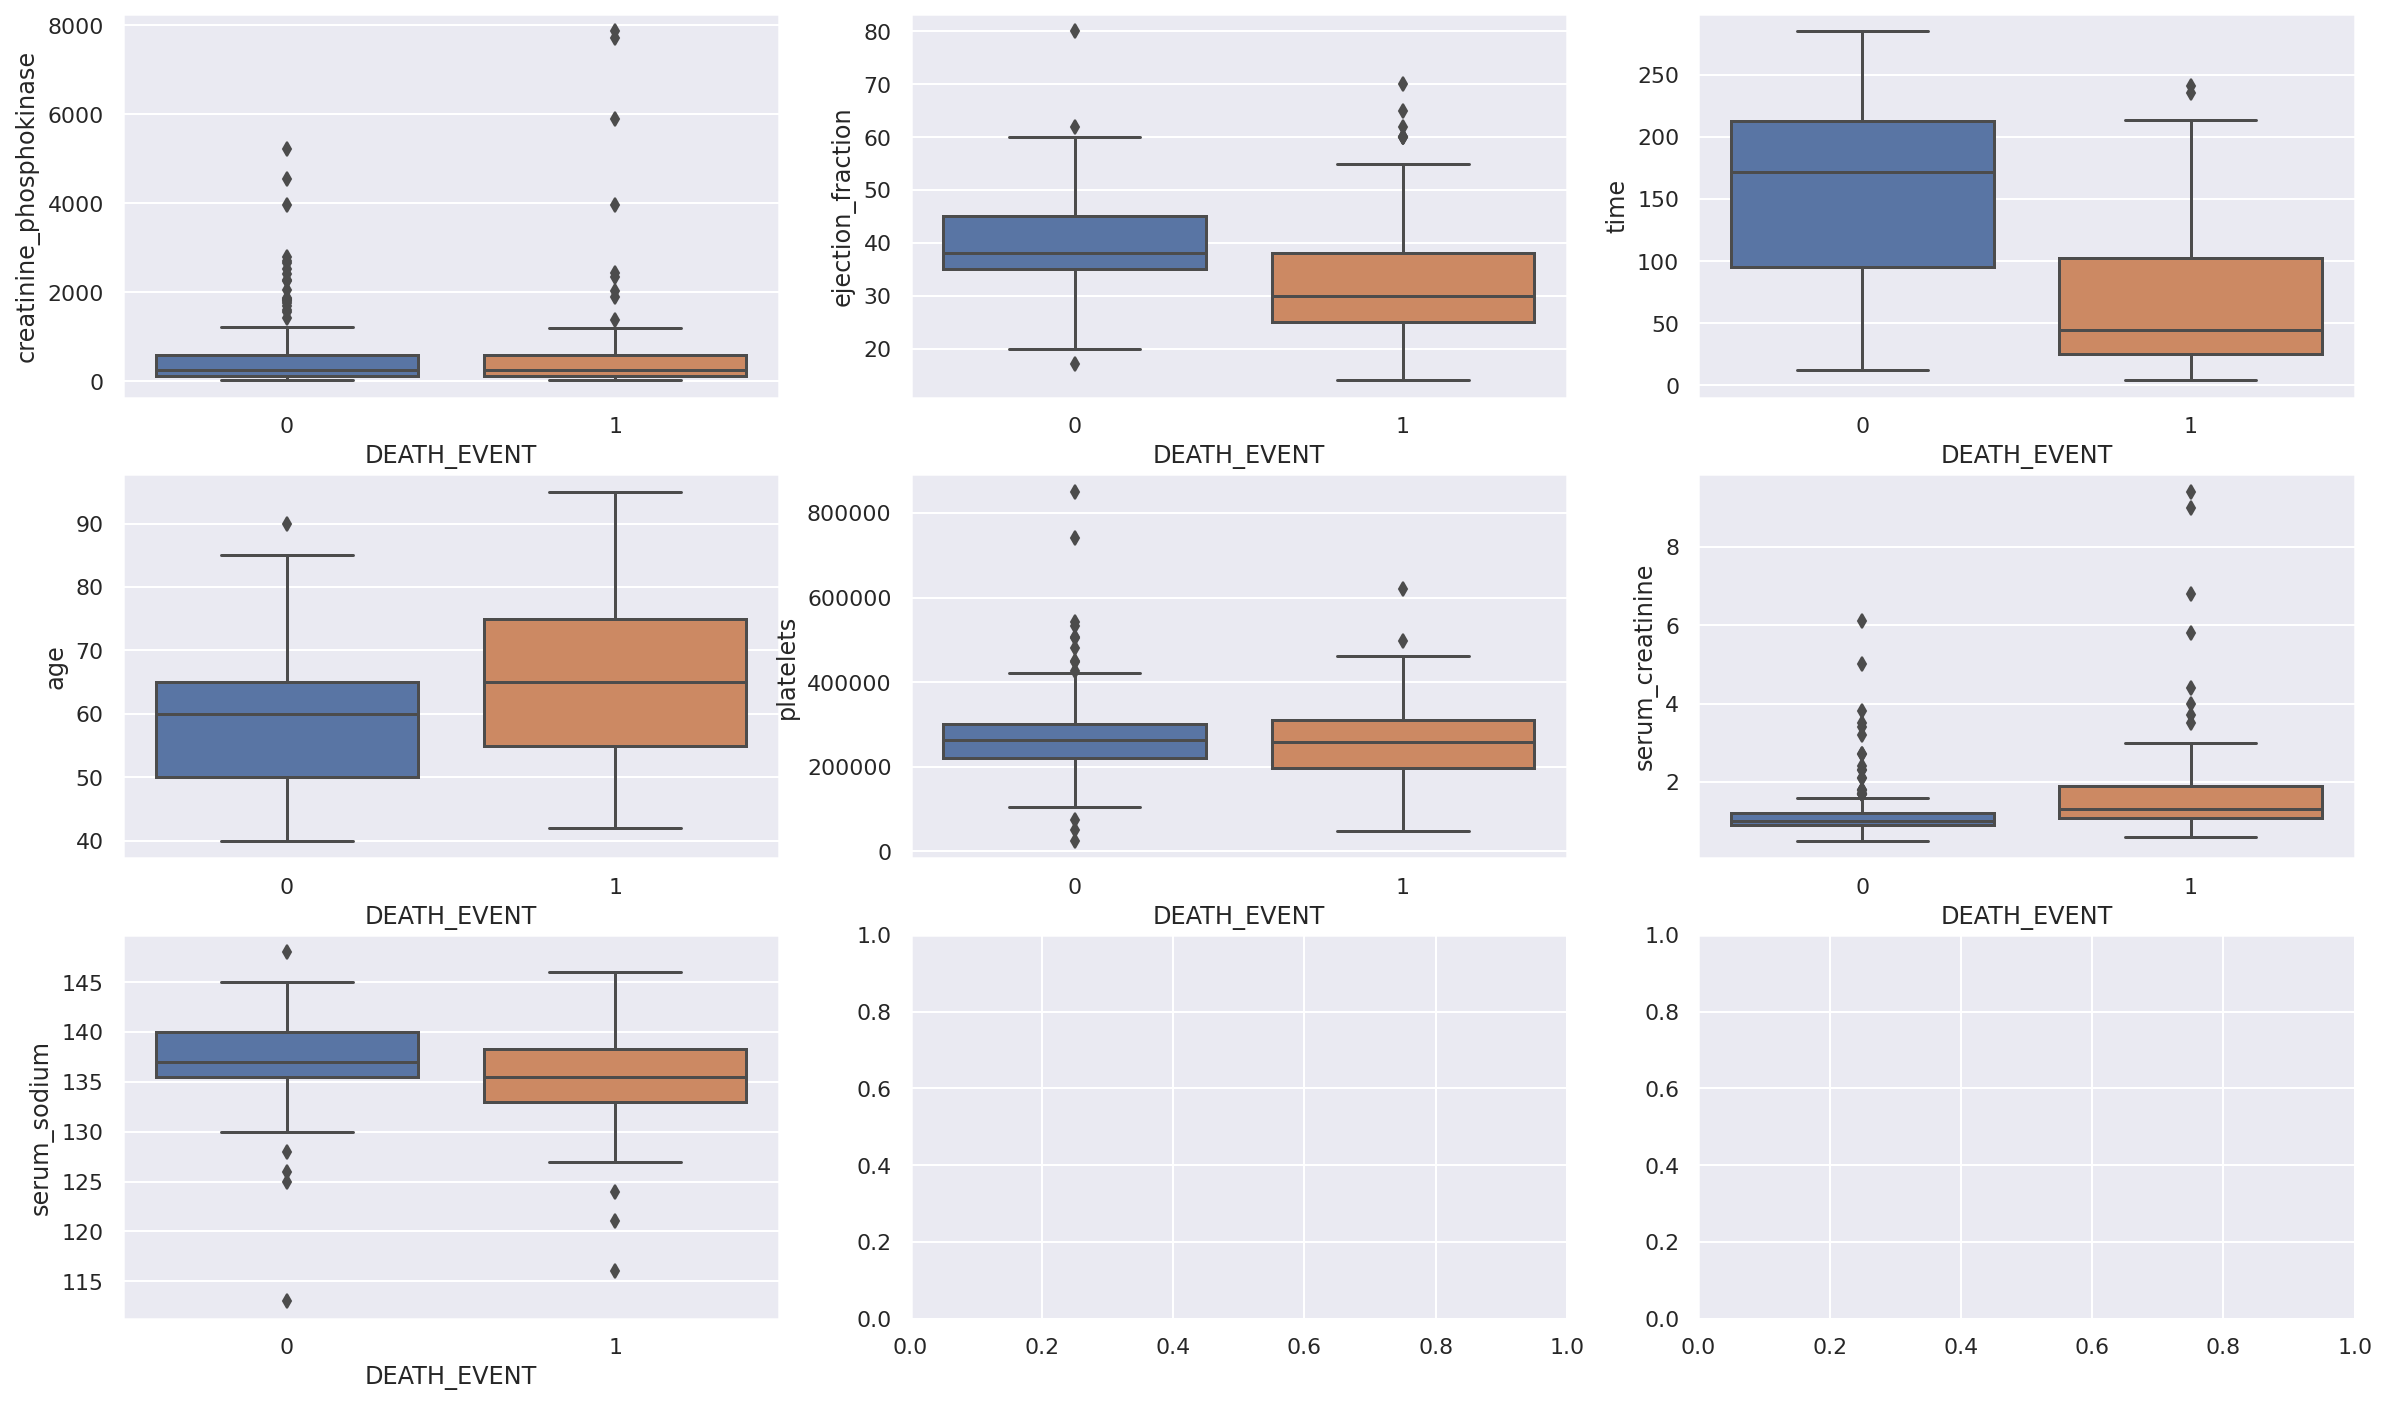

In [44]:
#plot boxplots to visualize numeric columns 
_, axes =  plt.subplots(3,3,figsize=(20,12))
sns.boxplot(x="DEATH_EVENT", y='creatinine_phosphokinase', data=df, ax= axes[0,0])
sns.boxplot(x="DEATH_EVENT", y='ejection_fraction', data=df, ax= axes[0,1])
sns.boxplot(x="DEATH_EVENT", y='time', data=df, ax= axes[0,2])
sns.boxplot(x="DEATH_EVENT", y='age', data=df, ax= axes[1,0])
sns.boxplot(x="DEATH_EVENT", y='platelets', data=df, ax= axes[1,1])
sns.boxplot(x="DEATH_EVENT", y='serum_creatinine', data=df, ax= axes[1,2])
sns.boxplot(x="DEATH_EVENT", y='serum_sodium', data=df, ax= axes[2,0])

We can see that less serum_sodium, ejection_fraction could lead to the death of a patient.  Also older people with heart attacks are more likely to die.

In [46]:
df.groupby(by='DEATH_EVENT')['platelets','creatinine_phosphokinase'].median()

,platelets,creatinine_phosphokinase
DEATH_EVENT,,
0,263000.0,245
1,258500.0,259
